In [1]:
import requests
from bs4 import BeautifulSoup
import csv

In [2]:
# URL of the product page
url = 'https://www.amazon.in/Samsung-Galaxy-Prime-Light-128GB/product-reviews/B0BD3V985M'

# Set headers to simulate a browser visit
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}

# Set up a CSV file to store the reviews
csv_file = open('amazon_reviews.csv', 'w', encoding='utf-8', newline='')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Name','Date','Rating', 'Title', 'reviewText'])

35

In [3]:
page_num = 1
while True:

  # Build the URL of the reviews page
  review_url = url + '/ref=cm_cr_getr_d_paging_btm_prev_{}'.format(page_num)
    
  # Get the HTML content of the reviews page
  response = requests.get(review_url, headers=headers)
  soup = BeautifulSoup(response.content, 'html.parser')
    
  # Extract the reviews from the page
  reviews = soup.find_all('div', {'data-hook': 'review'})
    
  # If there are no reviews on this page, stop the loop
  if len(reviews) == 0:
    break
    
  # Loop through the reviews and extract the rating, title, and text
  for review in reviews:
    rating = review.find('i', {'data-hook': 'review-star-rating'}).text.replace(' out of 5 stars', '')
    title = review.find('a', {'data-hook': 'review-title'}).text.strip()
    text = review.find('span', {'data-hook': 'review-body'}).text.strip()
    name = review.find('span' , {'class' : 'a-profile-name'}).text.strip()
    date = review.find('span' , {'data-hook' : 'review-date'}).text.strip()
    # Write the review data to the CSV file
    csv_writer.writerow([name,date,rating, title, text])
    
  # Increment the page number and continue the loop
  page_num += 1

# Close the CSV file

print(page_num)


1799


In [5]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 7.5 MB/s eta 0:00:00


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import cufflinks as cf
%matplotlib inline 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected = True)
cf.go_offline
from plotly.subplots import make_subplots



In [7]:
df = pd.read_csv("amazon_reviews.csv");

In [8]:
df.head()

,Name,Date,Rating,Title,reviewText
0,Anindita,Reviewed in India on 22 February 2023,4.0,"Features could have been better at this price ,",3 month prime membership only for prepaid cust...
1,Bhavesh mangukiya,Reviewed in India on 12 March 2023,4.0,Good one,Good purchase
2,Bhaurao namdev godse,Reviewed in India on 4 March 2023,4.0,Good,Good mobile
3,Vivy,Reviewed in India on 15 January 2023,4.0,Not sure a good choice,I was in doubt about samsung previously as wel...
4,Vishwajeet Anand,Reviewed in India on 6 March 2023,4.0,Good,Update are on time and it will get android 14 ...


In [9]:
print(df['Name'].isnull().sum())
print(df['reviewText'].isnull().sum())

0
0


In [10]:
def missing_values_analysis(df):
  na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
  n_miss = df[na_columns].isnull().sum().sort_values(ascending=True)
  ratio = (df[na_columns].isnull().sum()/df.shape[0]*100).sort_values(ascending=True)
  missing_df = pd.concat([n_miss,np.round(ratio,2)],axis=1,keys=['Missing values','Ratio'])
  missing_df = pd.DataFrame(missing_df)
  return missing_df

def check_dataframe(df):
  print("SHAPE".center(82,'-'))
  print(f"Rows: {df.shape[0]}")
  print(f"Columns: {df.shape[1]}")
  print("TYPES".center(82,'-'))
  print(df.dtypes)
  print("".center(82,'-'))
  print(missing_values_analysis(df))



In [11]:
missing_values_analysis(df)
check_dataframe(df)

--------------------------------------SHAPE---------------------------------------
Rows: 17979
Columns: 5
--------------------------------------TYPES---------------------------------------
Name           object
Date           object
Rating        float64
Title          object
reviewText     object
dtype: object
----------------------------------------------------------------------------------
Empty DataFrame
Columns: [Missing values, Ratio]
Index: []


In [12]:
df['Name'] = df['Name'].fillna("random")
print(df['Name'].isnull().sum())
df['Name'] = df['Name'].fillna("Neutral")
print(df['reviewText'].isnull().sum())

0
0


In [13]:
classes = []
for col in  df.columns:
  classes.append(df[col].nunique())
def check_class(df):
  nunique_df = pd.DataFrame({'Variable' : df.columns, 'Classes': classes})
  nunique_df = nunique_df.sort_values('Classes',ascending=False)
  nunique_df = nunique_df.reset_index()
  return nunique_df
check_class(df)

,index,Variable,Classes
0,1,Date,18
1,0,Name,10
2,4,reviewText,10
3,3,Title,9
4,2,Rating,2


In [14]:
df['reviewText'].head()

0    3 month prime membership only for prepaid cust...
1                                        Good purchase
2                                          Good mobile
3    I was in doubt about samsung previously as wel...
4    Update are on time and it will get android 14 ...
Name: reviewText, dtype: object

In [15]:
review_example = df.loc[1031].reviewText
review_example

'Good purchase'

In [16]:
review_example = re.sub("[^a-zA-Z]" , " " , review_example)
review_example

'Good purchase'

In [17]:
review_example = review_example.lower().split()
review_example

['good', 'purchase']

In [19]:
def change(x):
  return re.sub("[^a-zA-Z]",' ',str(x))
df['reviewText'] = df['reviewText'].map(change)
df['reviewText'] = df['reviewText'].str.lower()
df.head() 
     

,Name,Date,Rating,Title,reviewText
0,Anindita,Reviewed in India on 22 February 2023,4.0,"Features could have been better at this price ,",month prime membership only for prepaid cust...
1,Bhavesh mangukiya,Reviewed in India on 12 March 2023,4.0,Good one,good purchase
2,Bhaurao namdev godse,Reviewed in India on 4 March 2023,4.0,Good,good mobile
3,Vivy,Reviewed in India on 15 January 2023,4.0,Not sure a good choice,i was in doubt about samsung previously as wel...
4,Vishwajeet Anand,Reviewed in India on 6 March 2023,4.0,Good,update are on time and it will get android ...


In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
neg = []
neu = []
pos = []
sentiment = []
def sentiment_scores(sentence):
  side_obj = SentimentIntensityAnalyzer() #create an object
  sentiment_dict = side_obj.polarity_scores(sentence)
  #print(sentiment_dict)
  neg.append(sentiment_dict['neg']*100)
  neu.append(sentiment_dict['neu']*100)
  pos.append(sentiment_dict['pos']*100)
  if sentiment_dict['compound'] >= 0.05 :
    sentiment.append("Positive")
  elif sentiment_dict['compound'] <= -0.05:
    sentiment.append("Negative")
  else:
    sentiment.append("Nuetral")


for sentence in df['reviewText']:
  sentiment_scores(sentence)

print(sentiment)


['Positive', 'Positive', 'Positive', 'Negative', 'Nuetral', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Nuetral', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Nuetral', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Nuetral', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Nuetral', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Nuetral', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Nuetral', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Nuetral', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative',

In [21]:
final_sentiment = pd.Series(sentiment)
final_sentiment
df = pd.concat([df,final_sentiment],axis=1)
df.rename(columns = {0:'final_sentiment'}, inplace = True)
df.head()

,Name,Date,Rating,Title,reviewText,final_sentiment
0,Anindita,Reviewed in India on 22 February 2023,4.0,"Features could have been better at this price ,",month prime membership only for prepaid cust...,Positive
1,Bhavesh mangukiya,Reviewed in India on 12 March 2023,4.0,Good one,good purchase,Positive
2,Bhaurao namdev godse,Reviewed in India on 4 March 2023,4.0,Good,good mobile,Positive
3,Vivy,Reviewed in India on 15 January 2023,4.0,Not sure a good choice,i was in doubt about samsung previously as wel...,Negative
4,Vishwajeet Anand,Reviewed in India on 6 March 2023,4.0,Good,update are on time and it will get android ...,Nuetral


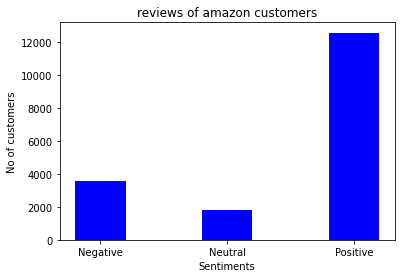

In [27]:
sentiments = ['Negative','Neutral','Positive']
ng = 0
nt = 0
pst = 0
for item in df['final_sentiment']:
  if(item=='Negative'):
    ng+=1
  elif(item=='Nuetral'):
    nt+=1
  else:
    pst+=1
values = [ng,nt,pst]
plt.bar(sentiments,values,color='blue',width=0.4)
plt.xlabel("Sentiments")
plt.ylabel("No of customers")
plt.title('reviews of amazon customers')
plt.show()

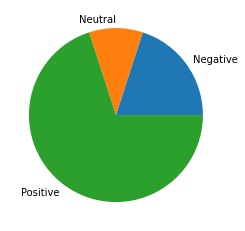

In [28]:
plt.pie(values,labels=sentiments)
plt.show()